In [ ]:
# %pip install pydeseq2

https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_minimal_pydeseq2_pipeline.html#id5

In [1]:
import os
import pickle as pkl
import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

SAVE = False  # whether to save the outputs of this notebook

if SAVE:
    # Replace this with the path to directory where you would like results to be saved
    OUTPUT_PATH = "data/interim"
    os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

In [2]:
# Unnormalized counts are REQUIRED for this worflow.
# Genes are rows, samples are columns
counts = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_unnormalized.csv')
counts

,gene_id \ rnaseq_profile_id,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
0,499304660,0.76,0.06,0.00,0.00,0.00,0.00,0.00,0.17,0.24,...,0.45,0.47,0.00,0.63,0.34,0.00,0.00,0.18,0.00,0.00
1,499304661,4.00,8.26,4.03,3.58,3.59,4.91,5.07,3.53,3.77,...,5.47,3.96,4.12,4.78,4.10,5.57,7.98,6.39,4.08,4.59
2,499304662,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,499304663,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,499304664,0.05,0.03,0.00,0.19,0.00,0.03,0.16,0.11,0.00,...,0.00,0.06,0.02,0.05,0.13,0.11,0.10,0.00,0.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50276,499355059,69.66,28.97,39.42,58.04,57.38,70.93,57.57,46.84,48.30,...,63.09,49.41,41.72,104.50,64.90,66.46,48.86,63.39,64.31,46.98
50277,499355060,0.00,0.00,2.45,0.00,4.37,4.57,0.00,7.34,0.00,...,2.12,0.00,0.00,4.70,3.65,0.00,0.00,2.34,9.37,1.97
50278,499355061,506.22,335.70,290.25,332.72,296.37,438.64,292.26,268.84,413.95,...,433.24,434.07,361.09,1001.76,528.94,449.38,395.83,488.67,453.48,390.83
50279,499355062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
# Set gene_id as header
counts = counts.set_index("gene_id \ rnaseq_profile_id")
counts

,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,496100288,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
gene_id \ rnaseq_profile_id,,,,,,,,,,,,,,,,,,,,,
499304660,0.76,0.06,0.00,0.00,0.00,0.00,0.00,0.17,0.24,0.00,...,0.45,0.47,0.00,0.63,0.34,0.00,0.00,0.18,0.00,0.00
499304661,4.00,8.26,4.03,3.58,3.59,4.91,5.07,3.53,3.77,5.49,...,5.47,3.96,4.12,4.78,4.10,5.57,7.98,6.39,4.08,4.59
499304662,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
499304663,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
499304664,0.05,0.03,0.00,0.19,0.00,0.03,0.16,0.11,0.00,0.16,...,0.00,0.06,0.02,0.05,0.13,0.11,0.10,0.00,0.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499355059,69.66,28.97,39.42,58.04,57.38,70.93,57.57,46.84,48.30,74.35,...,63.09,49.41,41.72,104.50,64.90,66.46,48.86,63.39,64.31,46.98
499355060,0.00,0.00,2.45,0.00,4.37,4.57,0.00,7.34,0.00,8.16,...,2.12,0.00,0.00,4.70,3.65,0.00,0.00,2.34,9.37,1.97
499355061,506.22,335.70,290.25,332.72,296.37,438.64,292.26,268.84,413.95,655.01,...,433.24,434.07,361.09,1001.76,528.94,449.38,395.83,488.67,453.48,390.83


In [4]:
# Drop empty rows
counts = counts[counts.sum(axis=1) > 0]
counts

,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,496100288,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
gene_id \ rnaseq_profile_id,,,,,,,,,,,,,,,,,,,,,
499304660,0.76,0.06,0.00,0.00,0.00,0.00,0.00,0.17,0.24,0.00,...,0.45,0.47,0.00,0.63,0.34,0.00,0.00,0.18,0.00,0.00
499304661,4.00,8.26,4.03,3.58,3.59,4.91,5.07,3.53,3.77,5.49,...,5.47,3.96,4.12,4.78,4.10,5.57,7.98,6.39,4.08,4.59
499304662,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
499304663,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
499304664,0.05,0.03,0.00,0.19,0.00,0.03,0.16,0.11,0.00,0.16,...,0.00,0.06,0.02,0.05,0.13,0.11,0.10,0.00,0.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499355059,69.66,28.97,39.42,58.04,57.38,70.93,57.57,46.84,48.30,74.35,...,63.09,49.41,41.72,104.50,64.90,66.46,48.86,63.39,64.31,46.98
499355060,0.00,0.00,2.45,0.00,4.37,4.57,0.00,7.34,0.00,8.16,...,2.12,0.00,0.00,4.70,3.65,0.00,0.00,2.34,9.37,1.97
499355061,506.22,335.70,290.25,332.72,296.37,438.64,292.26,268.84,413.95,655.01,...,433.24,434.07,361.09,1001.76,528.94,449.38,395.83,488.67,453.48,390.83


In [5]:
# Set genes as columns, samples as rows
counts = counts.T

In [6]:
#rename column to reflect that...
counts

gene_id \ rnaseq_profile_id,499304660,499304661,499304662,499304663,499304664,499304665,499304666,499304667,499304668,499304669,...,499355054,499355055,499355056,499355057,499355058,499355059,499355060,499355061,499355062,499355063
488395315,0.76,4.00,0.0,0.0,0.05,0.0,0.00,0.00,0.00,0.76,...,471.32,0.00,0.0,0.0,227.66,69.66,0.00,506.22,0.0,0.00
496100277,0.06,8.26,0.0,0.0,0.03,0.0,0.00,0.00,0.00,0.85,...,393.12,0.00,0.0,0.0,160.12,28.97,0.00,335.70,0.0,2.32
496100278,0.00,4.03,0.0,0.0,0.00,0.0,0.00,0.00,0.00,1.21,...,471.54,0.00,0.0,0.0,183.17,39.42,2.45,290.25,0.0,2.51
496100279,0.00,3.58,0.0,0.0,0.19,0.0,0.00,0.00,0.00,1.26,...,373.15,0.00,0.0,0.0,172.38,58.04,0.00,332.72,0.0,4.69
496100281,0.00,3.59,0.0,0.0,0.00,0.0,0.00,0.00,0.00,1.18,...,368.05,0.00,0.0,0.0,148.06,57.38,4.37,296.37,0.0,8.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496100667,0.00,5.57,0.0,0.0,0.11,0.0,0.00,0.08,0.00,1.04,...,581.95,0.00,0.0,0.0,246.90,66.46,0.00,449.38,0.0,0.00
496100669,0.00,7.98,0.0,0.0,0.10,0.0,0.11,0.00,0.00,1.20,...,522.08,2.01,0.0,0.0,234.28,48.86,0.00,395.83,0.0,2.06
496100670,0.18,6.39,0.0,0.0,0.00,0.0,0.00,0.00,0.03,0.61,...,420.32,0.00,0.0,0.0,198.03,63.39,2.34,488.67,0.0,0.00
496100671,0.00,4.08,0.0,0.0,0.05,0.0,0.00,0.00,0.00,1.28,...,606.00,0.00,0.0,0.0,236.53,64.31,9.37,453.48,0.0,1.92


In [7]:
#Prepare metadata
sample_data = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/columns-samples.csv')
sample_data

,rnaseq_profile_id,donor_id,donor_name,specimen_id,specimen_name,rna_well_id,polygon_id,structure_id,structure_acronym,structure_color,structure_name,hemisphere
0,488395315,309335467,H14.09.030,309357843,H14.09.030.TCx.01,395325172,320817998,10235,TCx,#ebbfd0,temporal neocortex,left
1,496100277,309335441,H14.09.004,309357624,H14.09.004.PCx.01,320630866,310967169,10557,FWM,#f2f1f0,white matter of forebrain,right
2,496100278,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630834,310790571,10557,FWM,#f2f1f0,white matter of forebrain,left
3,496100279,309335438,H14.09.001,309357599,H14.09.001.TCx.01,320630838,310790522,10235,TCx,#ebbfd0,temporal neocortex,left
4,496100281,309335439,H14.09.002,309357603,H14.09.002.HIP.01,320630842,310790372,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right
...,...,...,...,...,...,...,...,...,...,...,...,...
372,496100667,467056391,H15.09.103,467179071,H15.09.103.TCx.01,482655826,480366830,10235,TCx,#ebbfd0,temporal neocortex,right
373,496100669,467056391,H15.09.103,467179068,H15.09.103.PCx.01,482655822,480363830,10557,FWM,#f2f1f0,white matter of forebrain,right
374,496100670,467056406,H15.09.107,467179104,H15.09.107.TCx.01,482655780,480363840,10235,TCx,#ebbfd0,temporal neocortex,right
375,496100671,467056391,H15.09.103,467179065,H15.09.103.HIP.01,482655820,480366825,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right


In [8]:
# Load donor info
donor_info = pd.read_csv('../data/raw/DonorInformation.csv')
donor_info

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,309335458,H14.09.021,88,M,N,12,18,> 1 hr,0,1,Alzheimer's Disease Type,21,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,1,1
103,309335462,H14.09.025,84,M,N,16,23,10 min - 1 hr,0,2,Alzheimer's Disease Type,40,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,0,0
104,309335454,H14.09.017,79,M,N,16,13,< 10 sec,2,3,No Dementia,44,No Dementia,Y,White,Not Hispanic,No Dementia,3,2
105,309335486,H14.09.049,95-99,M,N,21,18,3-5 min,1,1,No Dementia,12,No Dementia,Y,White,Not Hispanic,No Dementia,3,1


In [9]:
# Process donor info to segregate control group
control_group_df = donor_info[donor_info['act_demented'] == 'No Dementia']
dementia_group_df = donor_info[donor_info['act_demented'] != 'No Dementia']

# Get donor ids
control_ids = control_group_df['donor_id']
dementia_ids = dementia_group_df['donor_id']

# Assign condition to sample data
sample_data['Condition'] = sample_data['donor_id'].apply(lambda x: 'control' if x in control_ids.values else 'dementia')
sample_data

,rnaseq_profile_id,donor_id,donor_name,specimen_id,specimen_name,rna_well_id,polygon_id,structure_id,structure_acronym,structure_color,structure_name,hemisphere,Condition
0,488395315,309335467,H14.09.030,309357843,H14.09.030.TCx.01,395325172,320817998,10235,TCx,#ebbfd0,temporal neocortex,left,control
1,496100277,309335441,H14.09.004,309357624,H14.09.004.PCx.01,320630866,310967169,10557,FWM,#f2f1f0,white matter of forebrain,right,control
2,496100278,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630834,310790571,10557,FWM,#f2f1f0,white matter of forebrain,left,control
3,496100279,309335438,H14.09.001,309357599,H14.09.001.TCx.01,320630838,310790522,10235,TCx,#ebbfd0,temporal neocortex,left,control
4,496100281,309335439,H14.09.002,309357603,H14.09.002.HIP.01,320630842,310790372,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right,dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,496100667,467056391,H15.09.103,467179071,H15.09.103.TCx.01,482655826,480366830,10235,TCx,#ebbfd0,temporal neocortex,right,control
373,496100669,467056391,H15.09.103,467179068,H15.09.103.PCx.01,482655822,480363830,10557,FWM,#f2f1f0,white matter of forebrain,right,control
374,496100670,467056406,H15.09.107,467179104,H15.09.107.TCx.01,482655780,480363840,10235,TCx,#ebbfd0,temporal neocortex,right,dementia
375,496100671,467056391,H15.09.103,467179065,H15.09.103.HIP.01,482655820,480366825,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right,control


In [10]:
# metadata = sample_data[['structure_acronym', 'hemisphere']].set_index(counts.index)
metadata = sample_data[['rnaseq_profile_id', 'Condition']].set_index('rnaseq_profile_id')
metadata.value_counts()

Condition
control      197
dementia     180
dtype: int64

# Single factor Analysis

In [11]:
# Set up Deseq object
try:
    DeseqDataSet(counts=counts,
             metadata = metadata,
             design_factors = ['Condition'])
except ValueError as err:
    print(err)

The count matrix should only contain integers.


In [12]:
# To solve the error above multply all values by 100
counts = (counts * 100).astype(int)
counts

gene_id \ rnaseq_profile_id,499304660,499304661,499304662,499304663,499304664,499304665,499304666,499304667,499304668,499304669,...,499355054,499355055,499355056,499355057,499355058,499355059,499355060,499355061,499355062,499355063
488395315,76,400,0,0,5,0,0,0,0,76,...,47132,0,0,0,22766,6966,0,50622,0,0
496100277,6,826,0,0,3,0,0,0,0,85,...,39312,0,0,0,16012,2897,0,33570,0,231
496100278,0,403,0,0,0,0,0,0,0,121,...,47154,0,0,0,18317,3942,245,29025,0,250
496100279,0,358,0,0,19,0,0,0,0,126,...,37315,0,0,0,17238,5804,0,33272,0,469
496100281,0,359,0,0,0,0,0,0,0,118,...,36805,0,0,0,14806,5738,437,29637,0,896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496100667,0,557,0,0,11,0,0,8,0,104,...,58195,0,0,0,24690,6645,0,44938,0,0
496100669,0,798,0,0,10,0,11,0,0,120,...,52208,200,0,0,23428,4886,0,39583,0,206
496100670,18,639,0,0,0,0,0,0,3,61,...,42032,0,0,0,19803,6339,234,48867,0,0
496100671,0,408,0,0,5,0,0,0,0,128,...,60600,0,0,0,23653,6431,936,45348,0,192


In [13]:
# Try again
dds = DeseqDataSet(counts=counts,
            metadata = metadata,
            design_factors = ['Condition'])

/opt/homebrew/Caskroom/miniforge/base/envs/pydseq2/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
# Run deseq2
dds.deseq2()

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds.pkl"), "wb") as f:
        pkl.dump(dds, f)

Fitting size factors...
... done in 0.38 seconds.

Fitting dispersions...
... done in 7.52 seconds.

Fitting dispersion trend curve...
... done in 6.45 seconds.

Fitting MAP dispersions...
... done in 9.24 seconds.

Fitting LFCs...
... done in 7.69 seconds.

Refitting 3322 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.47 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting LFCs...
... done in 0.52 seconds.



In [15]:
# Statistics have been added to dds object
dds

AnnData object with n_obs × n_vars = 377 × 46847
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

- X stores the count data,
- obs stores design factors,
- obsm stores sample-level data, such as "design_matrix" and "size_factors",
- varm stores gene-level data, such as "dispersions" and "LFC".


In [16]:
# What is LFC? - effect size
dds.varm["LFC"]

,intercept,Condition_dementia_vs_control
gene_id \ rnaseq_profile_id,,
499304660,2.754062,0.210758
499304661,6.278062,0.078745
499304662,-0.433948,-0.526065
499304663,-1.571206,-0.144364
499304664,1.660231,0.238667
...,...,...
499355059,8.525319,0.172778
499355060,5.205679,0.256876
499355061,10.679095,0.222003


## Statistical analysis with the DeseqStats class

In [17]:
# Dementia and control group and need to be defined before this is done...need to compare groups
# stat_res = DeseqStats(dds, contrast = ('Condition', 'dementia', 'control'))
stat_res = DeseqStats(dds)

In [18]:
stat_res.summary()

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "stat_results.pkl"), "wb") as f:
        pkl.dump(stat_res, f)

Running Wald tests...
... done in 2.87 seconds.



Log2 fold change & Wald test p-value: Condition dementia vs control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id \ rnaseq_profile_id,,,,,,
499304660,17.463519,0.304059,0.303310,1.002470,0.316117,0.478123
499304661,553.587751,0.113605,0.049718,2.285006,0.022312,0.057943
499304662,0.505540,-0.758952,0.000000,0.000000,NaN,NaN
499304663,0.032942,-0.208273,2.907955,-0.071622,0.942903,NaN
499304664,5.939429,0.344324,0.204711,1.681998,0.092569,0.186030
...,...,...,...,...,...,...
499355059,5494.710890,0.249266,0.081061,3.075033,0.002105,0.007775
499355060,207.798196,0.370593,0.480973,0.770507,0.440999,0.605803
499355061,48593.623377,0.320283,0.086038,3.722595,0.000197,0.000992


In [54]:
#Get dataframe from stat_res
res = stat_res.results_df
res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id \ rnaseq_profile_id,,,,,,
499304660,17.463519,0.304059,0.303310,1.002470,0.316117,0.478123
499304661,553.587751,0.113605,0.049718,2.285006,0.022312,0.057943
499304662,0.505540,-0.758952,0.000000,0.000000,NaN,NaN
499304663,0.032942,-0.208273,2.907955,-0.071622,0.942903,NaN
499304664,5.939429,0.344324,0.204711,1.681998,0.092569,0.186030
...,...,...,...,...,...,...
499355059,5494.710890,0.249266,0.081061,3.075033,0.002105,0.007775
499355060,207.798196,0.370593,0.480973,0.770507,0.440999,0.605803
499355061,48593.623377,0.320283,0.086038,3.722595,0.000197,0.000992


In [55]:
# Filter out low baseMean genes
res = res[res.baseMean >= 10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id \ rnaseq_profile_id,,,,,,
499304660,17.463519,0.304059,0.303310,1.002470,0.316117,0.478123
499304661,553.587751,0.113605,0.049718,2.285006,0.022312,0.057943
499304669,107.284624,-0.094419,0.062385,-1.513498,0.130153,0.243288
499304670,22.228359,0.655473,0.261734,2.504342,0.012268,0.035070
499304671,146.490919,0.367577,0.082446,4.458394,0.000008,0.000062
...,...,...,...,...,...,...
499355058,22807.503305,0.259428,0.089804,2.888832,0.003867,0.013127
499355059,5494.710890,0.249266,0.081061,3.075033,0.002105,0.007775
499355060,207.798196,0.370593,0.480973,0.770507,0.440999,0.605803


In [21]:
# filter by sig values and log2FoldChanfge
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id \ rnaseq_profile_id,,,,,,
499304670,22.228359,0.655473,0.261734,2.504342,1.226792e-02,3.507031e-02
499304689,1800.287229,0.502012,0.118160,4.248569,2.151406e-05,1.425479e-04
499304786,16.617125,0.615018,0.209844,2.930832,3.380558e-03,1.168236e-02
499304787,22.443675,0.599462,0.095159,6.299587,2.984399e-10,8.638478e-09
499304789,170.033223,0.797009,0.097325,8.189179,2.630133e-16,1.959953e-13
...,...,...,...,...,...,...
499354273,40806.923544,0.758961,0.116899,6.492439,8.445769e-11,2.946635e-09
499354366,22.435337,0.534282,0.214813,2.487199,1.287532e-02,3.659081e-02
499354471,16.258053,0.557126,0.126595,4.400846,1.078297e-05,7.793290e-05


~ 500 significant genes with a logfold change greater than 0.5.

## PCA

In [24]:
# !pip install scanpy

In [25]:
import scanpy as sc

In [26]:
sc.tl.pca(dds)

/opt/homebrew/Caskroom/miniforge/base/envs/pydseq2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


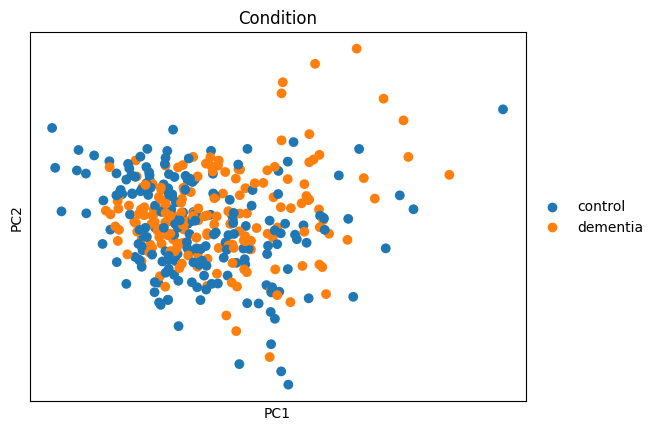

In [28]:
sc.pl.pca(dds, color = 'Condition', size = 200)

No clear difference between demntia and control

## GSEA

Need gene symbols from gene_id

In [35]:
gene_data = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')
gene_data

,gene_id,chromosome,gene_entrez_id,gene_symbol,gene_name
0,499304660,1,100287102,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...
1,499304661,1,653635,WASH7P,WAS protein family homolog 7 pseudogene
2,499304662,1,102466751,MIR6859-1,microRNA 6859-1
3,499304663,1,100302278,MIR1302-2,microRNA 1302-2
4,499304664,1,645520,FAM138A,"family with sequence similarity 138, member A"
...,...,...,...,...,...
50276,499355059,MT,4541,ND6,NADH dehydrogenase subunit 6
50277,499355060,MT,4556,TRNE,tRNA-Glu
50278,499355061,MT,4519,CYTB,cytochrome b
50279,499355062,MT,4576,TRNT,tRNA-Thr


In [65]:
sigs.index.name = 'gene_id'
sigs = sigs.reset_index()
sigs['gene_id'] = sigs['gene_id'].astype(int)
sigs

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,499304670,22.228359,0.655473,0.261734,2.504342,1.226792e-02,3.507031e-02
1,499304689,1800.287229,0.502012,0.118160,4.248569,2.151406e-05,1.425479e-04
2,499304786,16.617125,0.615018,0.209844,2.930832,3.380558e-03,1.168236e-02
3,499304787,22.443675,0.599462,0.095159,6.299587,2.984399e-10,8.638478e-09
4,499304789,170.033223,0.797009,0.097325,8.189179,2.630133e-16,1.959953e-13
...,...,...,...,...,...,...,...
542,499354273,40806.923544,0.758961,0.116899,6.492439,8.445769e-11,2.946635e-09
543,499354366,22.435337,0.534282,0.214813,2.487199,1.287532e-02,3.659081e-02
544,499354471,16.258053,0.557126,0.126595,4.400846,1.078297e-05,7.793290e-05
545,499354709,18210.947916,0.799255,0.126905,6.298045,3.014235e-10,8.696093e-09


In [66]:
sigs = sigs.merge(gene_data[['gene_id', 'gene_symbol']], on= 'gene_id', how = 'left').set_index('gene_id')
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
gene_id,,,,,,,
499304670,22.228359,0.655473,0.261734,2.504342,1.226792e-02,3.507031e-02,CICP27
499304689,1800.287229,0.502012,0.118160,4.248569,2.151406e-05,1.425479e-04,MTND2P28
499304786,16.617125,0.615018,0.209844,2.930832,3.380558e-03,1.168236e-02,LOC105378593
499304787,22.443675,0.599462,0.095159,6.299587,2.984399e-10,8.638478e-09,LOC105378592
499304789,170.033223,0.797009,0.097325,8.189179,2.630133e-16,1.959953e-13,LOC105378594
...,...,...,...,...,...,...,...
499354273,40806.923544,0.758961,0.116899,6.492439,8.445769e-11,2.946635e-09,CDR1
499354366,22.435337,0.534282,0.214813,2.487199,1.287532e-02,3.659081e-02,LOC100420322
499354471,16.258053,0.557126,0.126595,4.400846,1.078297e-05,7.793290e-05,AVPR2


In [30]:
# !pip install gseapy

In [63]:
import gseapy as gp
from gseapy.plot import gseaplot

In [68]:
ranking = sigs[['gene_symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking



,gene_symbol,stat
gene_id,,
499334626,SLC6A12,9.082623
499329195,COL27A1,8.963583
499348654,BCAM,8.781512
499315843,DOK7,8.689735
499334295,BCL9L,8.506859
...,...,...
499336206,LOC728084,-6.622246
499324505,TAC1,-6.788942
499315537,SST,-7.017342


In [69]:
ranking.drop_duplicates('gene_symbol')
ranking

,gene_symbol,stat
gene_id,,
499334626,SLC6A12,9.082623
499329195,COL27A1,8.963583
499348654,BCAM,8.781512
499315843,DOK7,8.689735
499334295,BCL9L,8.506859
...,...,...
499336206,LOC728084,-6.622246
499324505,TAC1,-6.788942
499315537,SST,-7.017342


In [70]:
# Gene set
manual_set = {'symbols': ranking['gene_symbol'].values}

https://medium.com/omics-diary/how-to-use-gseapy-for-pathway-enrichment-analysis-67a1aab1002d

In [71]:
pre_res = gp.prerank(rnk=ranking, gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6, permutation_num = 100)

2023-10-27 23:47:36,933 [WARNING] Duplicated values found in preranked stats: 1.28% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [72]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__regulation of gene...,0.061082,0.437514,1.624708
1,GO_Biological_Process_2021__regulation of tran...,0.091623,0.413595,1.642637
2,GO_Biological_Process_2021__positive regulatio...,0.097731,0.389824,1.490565
3,GO_Biological_Process_2021__positive regulatio...,0.097731,0.464407,1.755206
4,GO_Biological_Process_2021__regulation of tran...,0.106894,0.428274,1.528960
5,GO_Biological_Process_2021__regulation of cell...,0.363002,0.292483,1.088506
6,GO_Biological_Process_2021__positive regulatio...,0.409250,0.313837,1.105224


In [73]:
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2021__regulation of cell population proliferation (GO:0042127)'

In [91]:
prr = pre_res.results['GO_Biological_Process_2021__positive regulation of multicellular organismal process (GO:0051240)']
prr

{'name': 'prerank',
 'es': 0.3138373948161323,
 'nes': 1.1052239725488187,
 'pval': 0.379746835443038,
 'fdr': 0.40924956369982546,
 'fwerp': 0.67,
 'tag %': '5/15',
 'gene %': '13.71%',
 'lead_genes': 'BCL9L;KDM6B;LEF1;ZNF703;SCX',
 'matched_genes': 'BCL9L;KDM6B;LEF1;ZNF703;SCX;FOXJ1;G0S2;CCR2;SIX1;AVPR2;COL1A1;NKX6-1;IL1A;CRH;VIP',
 'hits': [4, 28, 56, 66, 74, 169, 220, 222, 229, 259, 288, 316, 503, 509, 529],
 'RES': [-0.0018796992481203006,
  -0.0037593984962406013,
  -0.005639097744360902,
  -0.007518796992481203,
  0.09556072447940424,
  0.09368102523128394,
  0.09180132598316364,
  0.08992162673504334,
  0.08804192748692304,
  0.08616222823880273,
  0.08428252899068243,
  0.08240282974256213,
  0.08052313049444183,
  0.07864343124632153,
  0.07676373199820123,
  0.07488403275008093,
  0.07300433350196063,
  0.07112463425384033,
  0.06924493500572003,
  0.06736523575759973,
  0.06548553650947943,
  0.06360583726135913,
  0.06172613801323883,
  0.059846438765118526,
  0.0579667395

In [96]:
# gseaplot(pre_res.ranking.values, hits = prr['hits'], nes = prr['nes'], pval = prr['pval'], fdr = prr['fdr'], RES = prr['RES'])

# gseaplot(pre_res.ranking,
#          term = 'GO_Biological_Process_2021__positive regulation of multicellular organismal process (GO:0051240)',
#          **pre_res.results['GO_Biological_Process_2021__positive regulation of multicellular organismal process (GO:0051240)'])

TypeError: gseaplot() got multiple values for argument 'term'

In [98]:
import numpy as np
import seaborn as sns

In [99]:
dds.layers['normed_counts']

array([[7.12646307e+01, 3.75077004e+02, 0.00000000e+00, ...,
        4.74678702e+04, 0.00000000e+00, 0.00000000e+00],
       [5.91024180e+00, 8.13643288e+02, 0.00000000e+00, ...,
        3.30678029e+04, 0.00000000e+00, 2.27544309e+02],
       [0.00000000e+00, 4.04362408e+02, 0.00000000e+00, ...,
        2.91231238e+04, 0.00000000e+00, 2.50845166e+02],
       ...,
       [1.68593506e+01, 5.98506945e+02, 0.00000000e+00, ...,
        4.57703269e+04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.07911981e+02, 0.00000000e+00, ...,
        4.53382170e+04, 0.00000000e+00, 1.91958579e+02],
       [0.00000000e+00, 4.30838616e+02, 0.00000000e+00, ...,
        3.66851103e+04, 0.00000000e+00, 0.00000000e+00]])

In [100]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [101]:
dds.layers['log1p']

array([[ 4.28033481,  5.92979392,  0.        , ..., 10.76782941,
         0.        ,  0.        ],
       [ 1.93300463,  6.70275033,  0.        , ..., 10.40634561,
         0.        ,  5.43173011],
       [ 0.        ,  6.0047815 ,  0.        , ..., 10.27932211,
         0.        ,  5.52881448],
       ...,
       [ 2.88252721,  6.39610756,  0.        , ..., 10.73141312,
         0.        ,  0.        ],
       [ 0.        ,  6.01349993,  0.        , ..., 10.72192765,
         0.        ,  5.26247555],
       [ 0.        ,  6.06805195,  0.        , ..., 10.5101535 ,
         0.        ,  0.        ]])

In [121]:
dds

AnnData object with n_obs × n_vars = 377 × 46847
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [124]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
gene_id,,,,,,,
499304670,22.228359,0.655473,0.261734,2.504342,1.226792e-02,3.507031e-02,CICP27
499304689,1800.287229,0.502012,0.118160,4.248569,2.151406e-05,1.425479e-04,MTND2P28
499304786,16.617125,0.615018,0.209844,2.930832,3.380558e-03,1.168236e-02,LOC105378593
499304787,22.443675,0.599462,0.095159,6.299587,2.984399e-10,8.638478e-09,LOC105378592
499304789,170.033223,0.797009,0.097325,8.189179,2.630133e-16,1.959953e-13,LOC105378594
...,...,...,...,...,...,...,...
499354273,40806.923544,0.758961,0.116899,6.492439,8.445769e-11,2.946635e-09,CDR1
499354366,22.435337,0.534282,0.214813,2.487199,1.287532e-02,3.659081e-02,LOC100420322
499354471,16.258053,0.557126,0.126595,4.400846,1.078297e-05,7.793290e-05,AVPR2


In [135]:
sigs.index = sigs.index.astype(str)

In [136]:
sigs.index

Index(['499304670', '499304689', '499304786', '499304787', '499304789',
       '499304801', '499304809', '499304813', '499304819', '499304858',
       ...
       '499353463', '499353745', '499353908', '499354027', '499354110',
       '499354273', '499354366', '499354471', '499354709', '499354977'],
      dtype='object', name='gene_id', length=547)

In [137]:
dds

AnnData object with n_obs × n_vars = 377 × 46847
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [138]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 377 × 547
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [139]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)



/opt/homebrew/Caskroom/miniforge/base/envs/pydseq2/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


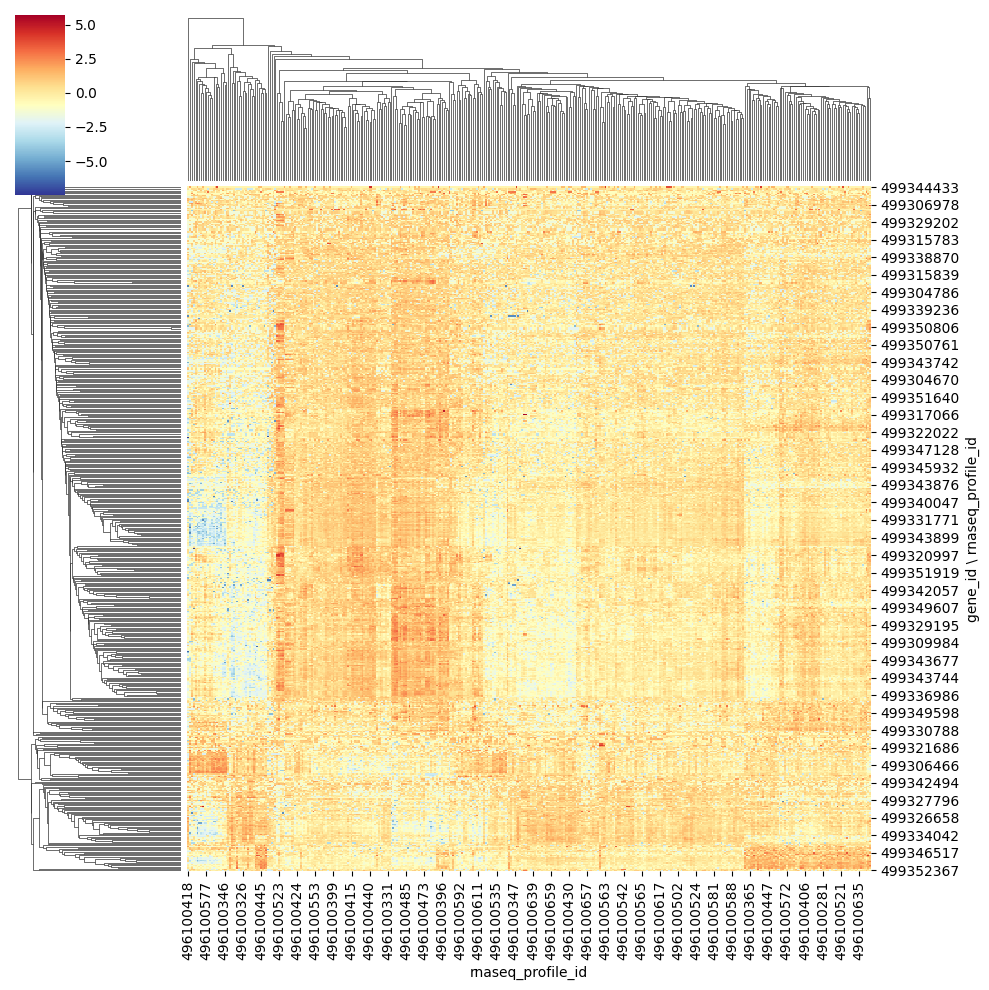

In [140]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [142]:
#volcano
from sanbomics.plots import volcano

res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
gene_id,,,,,,,
499304660,17.463519,0.304059,0.303310,1.002470,0.316117,0.478123,DDX11L1
499304661,553.587751,0.113605,0.049718,2.285006,0.022312,0.057943,WASH7P
499304669,107.284624,-0.094419,0.062385,-1.513498,0.130153,0.243288,LOC105379213
499304670,22.228359,0.655473,0.261734,2.504342,0.012268,0.035070,CICP27
499304671,146.490919,0.367577,0.082446,4.458394,0.000008,0.000062,LOC729737
...,...,...,...,...,...,...,...
499355058,22807.503305,0.259428,0.089804,2.888832,0.003867,0.013127,ND5
499355059,5494.710890,0.249266,0.081061,3.075033,0.002105,0.007775,ND6
499355060,207.798196,0.370593,0.480973,0.770507,0.440999,0.605803,TRNE


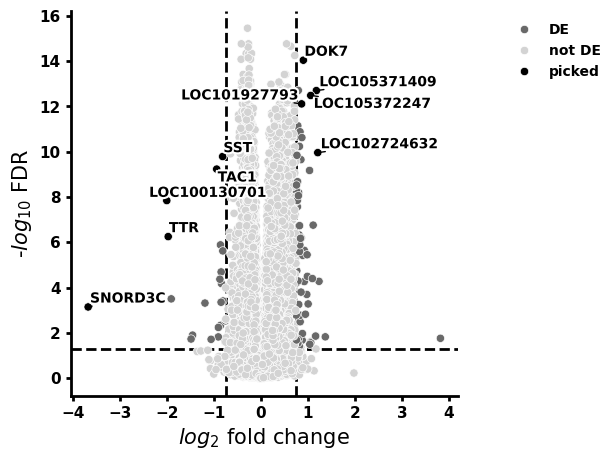

In [143]:
volcano(res, symbol='gene_symbol')

## Optional: Threshold-based test

Running Wald tests...
... done in 3.93 seconds.



Log2 fold change & Wald test p-value: Condition dementia vs control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id \ rnaseq_profile_id,,,,,,
499304660,17.463519,0.304059,0.303310,0.672774,0.501091,1.000000
499304661,553.587751,0.113605,0.049718,0.273646,0.784357,1.000000
499304662,0.505540,-0.758952,0.000000,0.000000,NaN,NaN
499304663,0.032942,-0.208273,2.907955,-0.037233,0.970299,NaN
499304664,5.939429,0.344324,0.204711,1.193506,0.232671,0.783146
...,...,...,...,...,...,...
499355059,5494.710890,0.249266,0.081061,1.841398,0.065563,0.330724
499355060,207.798196,0.370593,0.480973,0.562596,0.573710,1.000000
499355061,48593.623377,0.320283,0.086038,2.560313,0.010458,0.084615


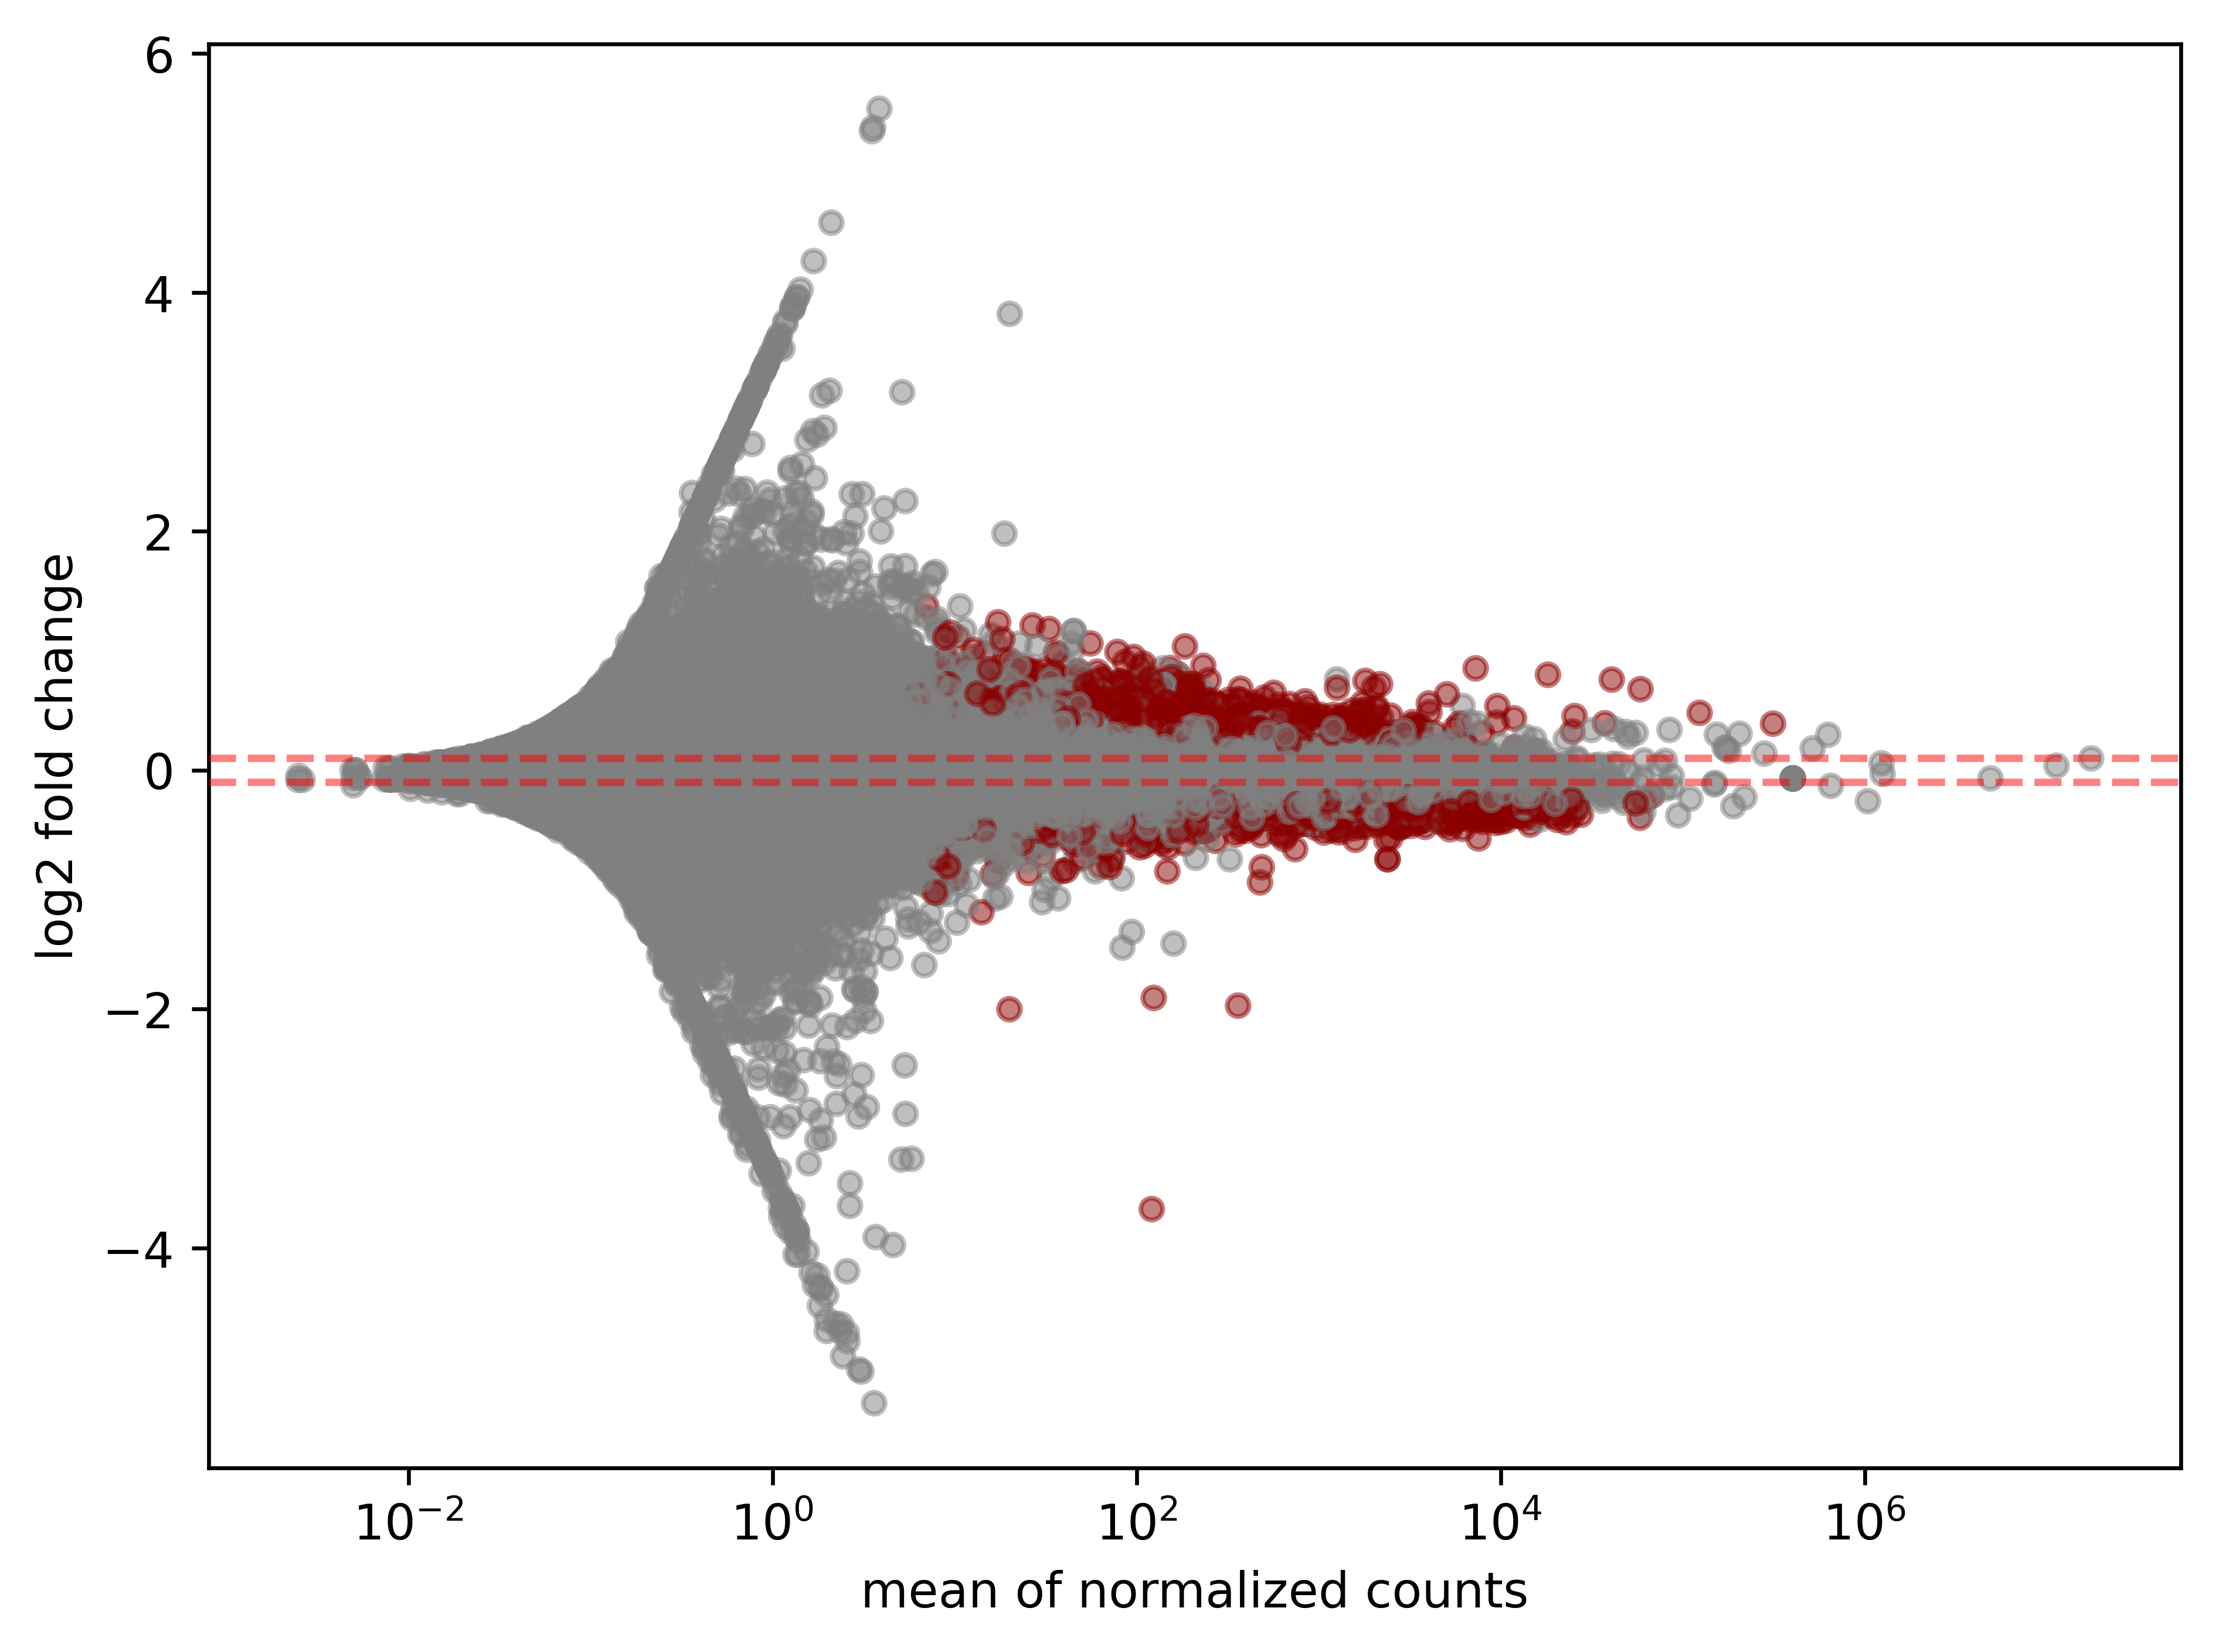

In [31]:
stat_res.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
stat_res.plot_MA(s=20)

In [34]:
#LFC shrinkage
"""Shrinkage of effect size (LFC estimates) is useful for visualization and ranking of genes.
It is more useful visualize the MA-plot for the shrunken log2 fold changes,
which remove the noise associated with log2 fold changes from low count genes without requiring arbitrary filtering thresholds."""

stat_res.lfc_shrink(coeff="Condition_dementia_vs_control")

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "shrunk_stat_results.pkl"), "wb") as f:
        pkl.dump(stat_res, f)


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: Condition dementia vs control


... done in 8.71 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id \ rnaseq_profile_id,,,,,,
499304660,17.463519,0.130208,0.247701,0.672774,0.501091,1.000000
499304661,553.587751,0.109541,0.049320,0.273646,0.784357,1.000000
499304662,0.505540,-0.006103,0.299292,0.000000,NaN,NaN
499304663,0.032942,-0.018482,0.251127,-0.037233,0.970299,NaN
499304664,5.939429,0.232635,0.195823,1.193506,0.232671,0.783146
...,...,...,...,...,...,...
499355059,5494.710890,0.252825,0.080610,1.841398,0.065563,0.330724
499355060,207.798196,0.080147,0.301169,0.562596,0.573710,1.000000
499355061,48593.623377,1.619757,0.087682,2.560313,0.010458,0.084615


In [ ]:
stat_res.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
stat_res.plot_MA(s=20)

# Multifactor Analysis